<a href="https://colab.research.google.com/github/khipucode/data_and_codes_phd/blob/main/3_3_1_1_analise_PM_Apm_vs_fase_eletronica_2D_fig_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Geração do mapa de calor de SD do PM - $A_{pm}$ vs $\alpha_{pm}$

In [ ]:
import math as mt
import numpy as np
from mpmath import *
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------
Vpi_pm1  = 3  # Vpi of phase modulator

# PM fixed parameters values, these work in cascade configuration
ang1pm = 0;  Upm1   =  0;        Tpm1  =  (pi*Upm1/Vpi_pm1);

#-------------------------------------------------------------------------------

#Function to reduce the extreme components of the vector for SLs comparison-----
#The reduction is for a given number of central lines
def reduct_vector(up_act, vec_comb, up_new):
 # up_act = current vector size vec_comb
 a = int((up_act-up_new)/2)
 b = int(a + up_new)
 c = int((up_new-1)/2)
 ax_rang = range(-c,c+1)
 ax_new = list(ax_rang)
 new_vcomb = []
 for k in range(a,b):
  new_vcomb.append(vec_comb[k])

 return new_vcomb
#-------------------------------------------------------------------------------


(47, 16)


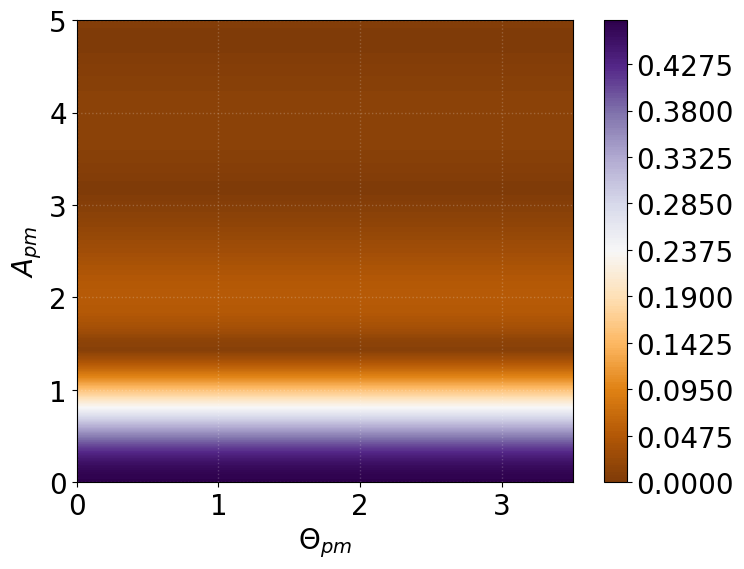

In [ ]:
up_n   =  9
top_n  =  int((up_n-1)/2)
ind_n  =  range(-top_n,top_n+1)
E2_pm  =  []


up_act          =  up_n
length_flat     =  3    # quantidade de linhas comparadas
length_matrix   =  50   # tamanho maixmo da voltagem multiplicado x 10 em V, para usar 20V colocar 200
length_matrix_2 =  35   # defasagem do sinal modulante
limit_axis_xy   =  length_matrix/10  # used only for plot
limit_axis_xy_2 =  length_matrix_2/10
#mx_st = [[0 for k in range(length_matrix)] for j in range(length_matrix)]
mx_st           =  np.zeros((length_matrix, length_matrix_2))


for iApm in range(length_matrix):  # Modulation amplitude signal
 for Tpm1 in range(length_matrix_2): # phase os modulation signal
   # var_Amz1b = var_Amz1a - pi/2;
    E2_pm     = []
    flat_cond = []
    temp2     = []
    pente_osa = []

    for n in ind_n:
        J_n_iApm = besselj(n,iApm/10)
        temp1    = J_n_iApm*exp(j*(n*ang1pm + Tpm1/10))
        temp    = (abs(temp1))**2
        E2_pm.append(temp)
        #print(temp)

    temp2     = [abs(k2) for k2 in E2_pm]
    pente_osa = np.square(temp2)
    flat_cond = reduct_vector(up_act, pente_osa, length_flat)
    st_dev    = np.std(flat_cond) #/np.mean(flat_cond)
    mx_st[iApm,Tpm1]= st_dev


posicao_min = np.unravel_index(mx_st.argmin(), mx_st.shape)
print(posicao_min)

ax_1 = np.linspace(0,limit_axis_xy_2,length_matrix_2)
ay_1 = np.linspace(0,limit_axis_xy,length_matrix)

plt.rcParams['font.size']=20

plt.figure(figsize=(8,6))
#plt.contourf(ax_1, ay_1, mx_st, 250, cmap='RdGy')
plt.contourf(ax_1, ay_1, mx_st, 200, cmap='PuOr')
#------------------------------
# Customize the grid
plt.grid(linestyle='dotted', color='white', linewidth=1, alpha=0.2)
#plt.grid(which='major', axis='both', linestyle='dotted', linewidth=0.5, color='gray', alpha=0.5, spacing=0.5)

plt.colorbar();
#plot a point in the graphics
#plt.scatter(3, 1.44, color='blue')
plt.xlabel("$\Theta_{pm}$", fontsize=20)
plt.ylabel("$A_{pm}$", fontsize=20)
plt.savefig('grafico1.pdf')


In [ ]:
# Convert v to dBm
Apm1    =  1.44
Vpm1   =  Apm1*Vpi_pm1/mt.pi
PdBm_pm1 = 10*mt.log10(10*Vpm1**2)

print('Vpm1',Vpm1)
print('PdBm_pm1',PdBm_pm1)

Vpm1 1.3750987083139758
PdBm_pm1 12.766677482415565


<ipython-input-10-6e9e0b9e25b2>:52: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-10-6e9e0b9e25b2>:63: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


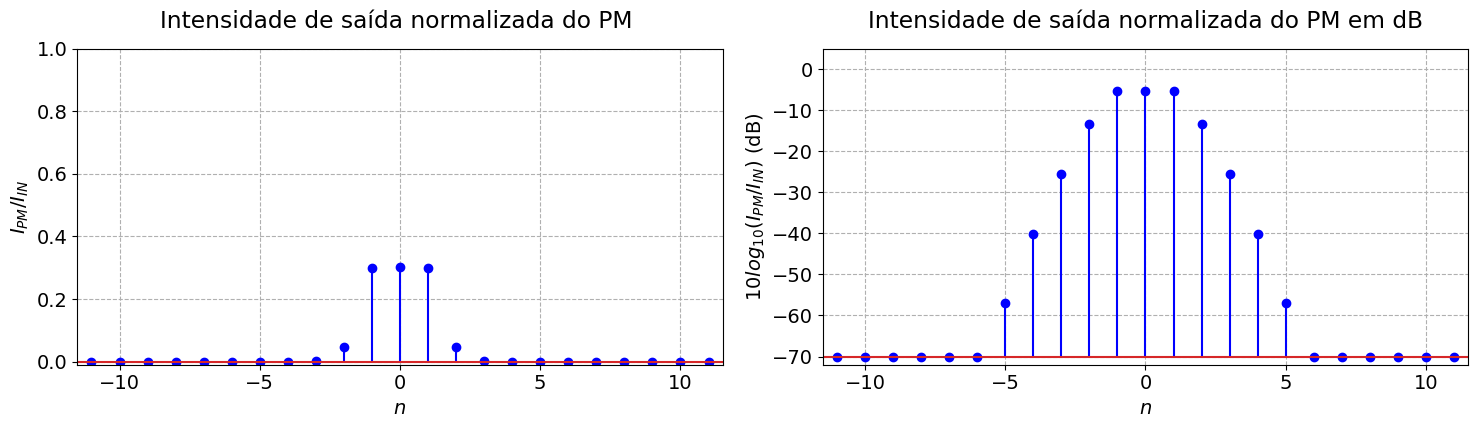

In [ ]:
Vpi_pm1  = 3
ts5 = 2*mt.sqrt(5)  # 4.47213

# Potências de entrada em dBm nas portas dos moduladores - tensão de amplitude pico
Ppm1     = 12.7;  ang1pm = 0;  Upm1   =  0;     Tpm1  =  (pi*Upm1/Vpi_pm1);
Apm1      = mt.pi*10**((Ppm1-10)/20)/Vpi_pm1


# ==============================================================================
# Apm1    = 3.2 # 4.8 #3.2 # 3.2# 1.44   # plot directo
up_n  =  35
#up_m  =  45  #67
noise = 10**-7; noise_dBm = 10*log10(noise)

#===============================================================================

#--------------------------- Preenchimento do vector PM
top_n = int((up_n-1)/2)
ind_n = range(-top_n,top_n+1)

Vector_pm = []
for n in ind_n:
  J_n_Apm = besselj(n,Apm1)
  Vector_pm.append(J_n_Apm)


#------------function calculate Intensity and add noise----------------
#  Usa um vetor de campo elétrico e calcula E.^2 e adiciona ruido
def find_Iout_add_noise(up_vec, Vector_efield_all, noise):
 temp2 = [abs(k2) for k2 in Vector_efield_all]
 Vector_Iout_all = np.square(temp2)
 ax_vector_comb  = []   # dominio do vetor resultante
 top_k = int((up_vec-1)/2)
 ax_vector_comb = range(-top_k,top_k+1)
 Comb_plot     = []    # vector usado para considerar o ruido
 Comb_plot_dBm = []    # vector usado para considerar o ruido en dBm
 for k1 in range(up_vec):
    temp  = Vector_Iout_all[k1]
    if temp < noise:
      Comb_plot.append(0)
      Comb_plot_dBm.append(10*log10(noise))
    else:
      Comb_plot.append(Vector_Iout_all[k1])
      Comb_plot_dBm.append(10*log10(temp))

 return ax_vector_comb,Comb_plot,Comb_plot_dBm

#----------------- FUNCAO PARA PLOTAR SLs --------------------------
def ploting_sl(axrange, comb, comb_dBm, sistem):
 fig, axes = plt.subplots(1, 2, figsize=(15, 4.5), tight_layout=True)
 plt.rcParams['font.size'] = '14'
 axes[0].stem(axrange,comb,
              use_line_collection = True, linefmt='blue', markerfmt='bo')
 axes[0].set_title('Intensidade de saída normalizada do'+ sistem, pad=15)
 axes[0].set_xlabel("$n$")
 axes[0].set_ylabel("$I_{PM}/I_{IN}$")
 axes[0].grid(True,which="both", linestyle='--')

 axes[0].set_xlim(-11.5, 11.5)
 axes[0].set_ylim(-0.01, 1.0)


 axes[1].stem(axrange,comb_dBm,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='blue', markerfmt='bo')
 axes[1].set_title('Intensidade de saída normalizada do'+sistem+'em dB', pad=15)
 axes[1].set_xlabel("$n$")
 axes[1].set_ylabel("$10 log_{10}(I_{PM}/I_{IN})$ (dB)")
 axes[1].grid(True,which="both", linestyle='--')

 axes[1].set_xlim(-11.5, 11.5)
 axes[1].set_ylim(-72, 5)

#--------------------------------------------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector pm
(ax_pm,comb_pm,comb_pm_dBm) = find_Iout_add_noise(up_n, Vector_pm, noise)
sistem1 = ' PM '
ploting_sl(ax_pm,comb_pm,comb_pm_dBm,sistem1)



Tamanho do vector de saida do modulador en estudo 35
Faixa entre inicio e final ia= 15 ib= 20
Desvio padrão das SLs avaliadas      : 0.124780638097682
Fator de variação SLs avaliadas      : 0.627607998073667
SD  :  0.124780638097682 Mean : 0.198819388026721
diferença entre mai e men               AV: 0.257671350159456
diferença entre mai_dB e men_dB (dB)    AV(dB): 8.1958136595036


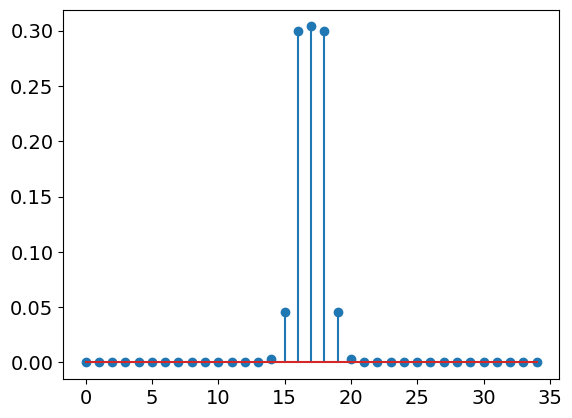

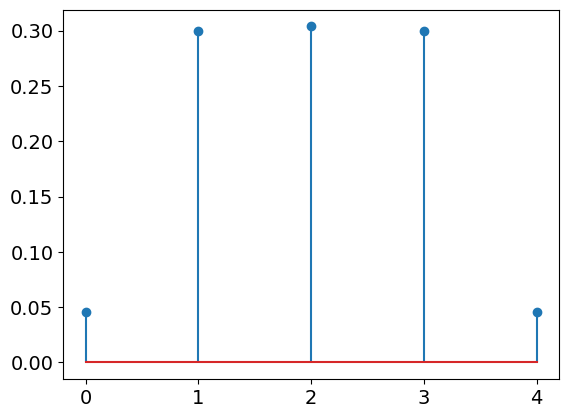

In [ ]:
# Geração do vetor de pente a ser analisado

vec_mz = [abs(k2)**2 for k2 in Vector_pm]   # calculo da intensidade das SLs

print('Tamanho do vector de saida do modulador en estudo',up_n)

up_x = up_n
up_4 = 5    # Encontramos as SLs centrais que foram analisadas
ia = int((up_x-up_4-2)/2+1)
ib = int((up_x+up_4-2)/2+1)

print('Faixa entre inicio e final ia=',ia, 'ib=',ib)

v_analyze = []         # Encontramos o vetor central a ser avaliado
for k in range(ia,ib):
  v_analyze.append(vec_mz[k])

print('Desvio padrão das SLs avaliadas      :', np.std(v_analyze))
print('Fator de variação SLs avaliadas      :', np.std(v_analyze)/np.mean(v_analyze))
print('SD  : ', np.std(v_analyze),'Mean :',np.mean(v_analyze))
menor = min(v_analyze)
men_dB = 10*log10(menor)
maior = max(v_analyze)
mai_dB = 10*log10(maior)
dif  = maior - menor
dif_dB_1  = mai_dB - men_dB


print('diferença entre mai e men               AV:', dif)
#print('diferença entre mai e men (dB)', dif_dB)
print('diferença entre mai_dB e men_dB (dB)    AV(dB):', dif_dB_1)

plt.stem(vec_mz)
plt.show()

plt.stem(v_analyze)
plt.show()

In [ ]:
import numpy as np
bot = 0;  top = 5 ;   elem_ax = np.arange(bot, top, 0.1)  # top value of Amzb
n_el = len(elem_ax)
print('Numero de elementosx1:', n_el)
#print('Elementos:', elem_ax)

bot1 = 0;  top1 = 3.5 ;   elem_ax1 = np.arange(bot1, top1, 0.1)  # top value of Amzb
n_el1 = len(elem_ax1)
print('Numero de elementos x2:', n_el1)

print('producto faixas:', n_el*n_el1)
nu = 0
for x in elem_ax:
  for y in elem_ax1:
    nu = nu+1

print('Numero total de amostras:', nu)

Numero de elementosx1: 50
Numero de elementos x2: 35
producto faixas: 1750
Numero total de amostras: 1750
